# Electron degeneracy derivatives

Compute the various thermodynamic derivatives of the electron-positron number density, pressure, and energy.
In general, each quantity is a function of various Fermi-Dirac integrals of the form:

$$F_k(\eta, \beta) = \int_0^\infty
           \frac{x^k [1 + (x\beta/2)]^{1/2}}{e^{x-\eta} + 1} dx$$

where $\beta = kT / (m_e c^2)$ and $\eta = (\mu - m_e c^2)/(kT)$

The expressions we use for $n_e$, $p_e$, $e_e$, and their positron equivalents come from Timmes & Arnett (1999), but note that their expression for $n_e$ is missing a $\beta$ factor.

In general, we compute the derivatives with respect to $\rho$ and $T$ via the chain rule, which means that we need $d\eta/d\rho |_T$, $d\eta/dT|_\rho$, and $d\beta/dT|_\rho = k / (m_e c^2)$ (note that $d\beta /d\rho|_T = 0)$.

In [1]:
from sympy import init_session

In [2]:
init_session()

IPython console for SymPy 1.13.1 (Python 3.13.5-64-bit) (ground types: gmpy)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.13.1/



## Setup the dependencies

We'll have $\rho$ and $T$ be the independent variables.

In [3]:
# Independent variables
rho, T = symbols('rho T')

We'll express $\eta = \eta(\rho, T)$ and $\beta = \beta(T)$ (since $\beta = kT / (m_e c^2)$).
When simplifying, we'll express $\beta = a T$ to evaluate the derivatives for us.

In [4]:
a = symbols("a", real=-True, positive=True)

In [5]:
eta = Function('eta')(rho, T)
beta = Function('beta')(T)

In [6]:
# for positrons, we will use eta_tilde in the expressions
eta_tilde_expr = -eta - 2 / beta

## Derivatives of $\eta$ with respect to $\rho$ and $T$

Now, we'll write the electron and positron densities as functions of the symbol $\eta$ and $\beta$

In [7]:
# dummy variables for the arguments
eta_sym, beta_sym = symbols('eta beta')
n_e_func = Function('n_e')(eta_sym, beta_sym)
n_p_func = Function('n_p')(eta_sym, beta_sym)

# Now substitute eta(rho, T) and beta(T) into n_e and n_p
n_e_expr = n_e_func.subs({eta_sym: eta, beta_sym: beta})
n_p_expr = n_p_func.subs({eta_sym: eta, beta_sym: beta})

Now we want to construct the expression

$$n_e - n_p = N_A \frac{Z}{A} \rho$$

we'll do this by defining the left and righthand sides separately.

In [8]:
lhs_expr = n_e_expr - n_p_expr

In [9]:
N_A, Z, A = symbols('N_A Z A', constant=True)
rhs_expr = (N_A * Z / A) * rho

### Compute $\partial \eta/\partial T$

In [10]:
lhs_diff = diff(lhs_expr, T)
rhs_diff = diff(rhs_expr, T)

In [11]:
# Solve for ∂η/∂T
deta_dT = symbols('deta_dT')
lhs_diff_sub = lhs_diff.subs(diff(eta, T), deta_dT)
deta_dT_expr = solve(lhs_diff_sub - rhs_diff, deta_dT)[0]

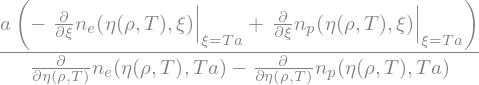

In [12]:
simplify(deta_dT_expr.subs(beta, a * T))

### Compute $\partial \eta / \partial \rho$

In [13]:
lhs_diff = diff(lhs_expr, rho)
rhs_diff = diff(rhs_expr, rho)

In [14]:
# Solve for ∂η/∂ρ
deta_drho = symbols('deta_drho')
lhs_diff_sub = lhs_diff.subs(diff(eta, rho), deta_drho)
deta_drho_expr = solve(lhs_diff_sub - rhs_diff, deta_drho)[0]

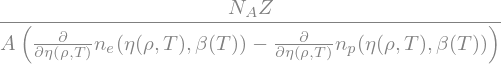

In [15]:
deta_drho_expr

### Compute $\partial^2 \eta/\partial T^2$

In [16]:
lhs_diff = diff(lhs_expr, T, T)
rhs_diff = diff(rhs_expr, T, T)

In [17]:
# Solve for ∂²η/∂T²
d2eta_dT2 = symbols('d2eta_dT2')
lhs_diff_sub = lhs_diff.subs(diff(eta, T, T), d2eta_dT2)
d2eta_dT2_expr = solve(lhs_diff_sub - rhs_diff, d2eta_dT2)[0]

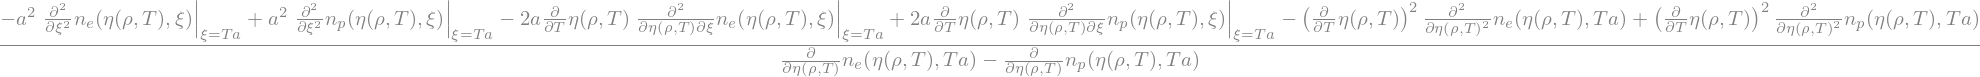

In [18]:
simplify(d2eta_dT2_expr.subs(beta, a * T))

### Compute $\partial^2 \eta /\partial \rho \partial T$

In [19]:
lhs_diff = diff(lhs_expr, T, rho)
rhs_diff = diff(rhs_expr, T, rho)

In [20]:
# Solve for ∂²η/∂T∂ρ
d2eta_dTdrho = symbols('d2eta_dTdrho')
lhs_diff_sub = lhs_diff.subs(diff(eta, T, rho), d2eta_dTdrho)
d2eta_dTdrho_expr = solve(lhs_diff_sub - rhs_diff, d2eta_dTdrho)[0]

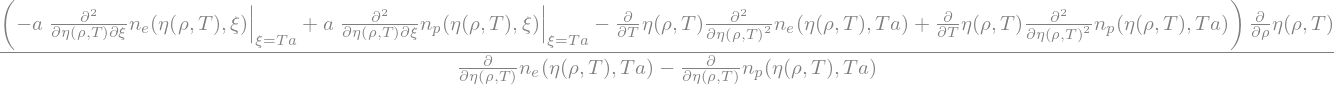

In [21]:
simplify(d2eta_dTdrho_expr.subs(beta, a * T))

### Compute $\partial^2 \eta /\partial \rho^2$

In [22]:
lhs_diff = diff(lhs_expr, rho, rho)
rhs_diff = diff(rhs_expr, rho, rho)

In [23]:
# Solve for ∂²η/∂ρ²
d2eta_drho2 = symbols('d2eta_drho2')
lhs_diff_sub = lhs_diff.subs(diff(eta, rho, rho), d2eta_drho2)
d2eta_drho2_expr = solve(lhs_diff_sub - rhs_diff, d2eta_drho2)[0]

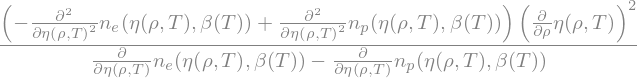

In [24]:
simplify(d2eta_drho2_expr)

## Derivatives of the $n_e$ and $n_p$ with respect to $\eta$ and $\beta$

### First $n_e$

In [25]:
F12_func = Function("F_{1/2}")(eta_sym, beta_sym)
F32_func = Function("F_{3/2}")(eta_sym, beta_sym)
F52_func = Function("F_{5/2}")(eta_sym, beta_sym)

F12_expr = F12_func.subs({eta_sym: eta, beta_sym: beta})
F32_expr = F32_func.subs({eta_sym: eta, beta_sym: beta})
F52_expr = F52_func.subs({eta_sym: eta, beta_sym: beta})

now write out what the number densities are

In [26]:
C = symbols("C", constant=True)

In [27]:
n_e_full = C * beta**Rational(3,2) * (F12_expr + beta * F32_expr)

$\partial n_e / \partial \eta$

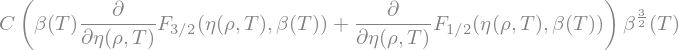

In [28]:
dne_deta = diff(n_e_full, eta)
dne_deta

$\partial n_e / \partial \beta$

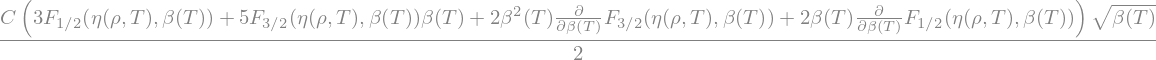

In [29]:
dne_dbeta = diff(n_e_full, beta)
simplify(dne_dbeta)

### Next, $n_p$

In [30]:
F12_tilde_expr = F12_func.subs({eta_sym: eta_tilde_expr, beta_sym: beta})
F32_tilde_expr = F32_func.subs({eta_sym: eta_tilde_expr, beta_sym: beta})
F52_tilde_expr = F52_func.subs({eta_sym: eta_tilde_expr, beta_sym: beta})

In [31]:
n_p_full = C * beta**Rational(3,2) * (F12_tilde_expr + beta * F32_tilde_expr)

$\partial n_p /\partial \eta$

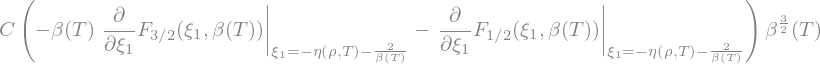

In [32]:
dnp_deta = diff(n_p_full, eta)
dnp_deta

$\partial n_p / \partial \beta$

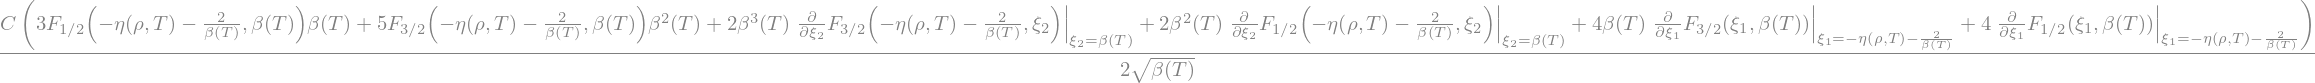

In [33]:
dnp_dbeta = diff(n_p_full, beta)
simplify(dnp_dbeta)

### Second derivatives

$\partial^2 n_e / \partial \eta^2$

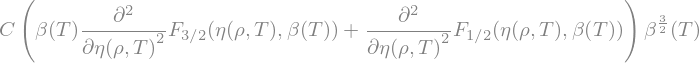

In [34]:
d2ne_deta2 = diff(n_e_full, eta, eta)
d2ne_deta2

$\partial^2 n_e / \partial \eta \partial\beta$

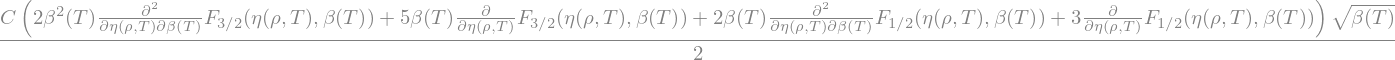

In [35]:
d2ne_detadbeta = diff(n_e_full, eta, beta)
simplify(d2ne_detadbeta)

$\partial^2 n_e / \partial \beta^2$

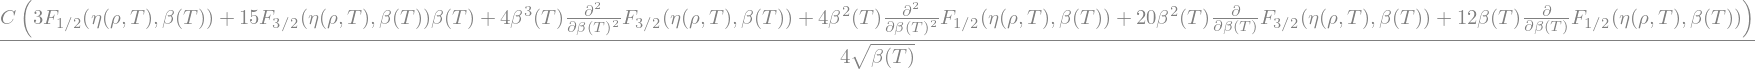

In [36]:
d2ne_dbeta2 = diff(n_e_full, beta, beta)
simplify(d2ne_dbeta2)

$\partial^2 n_p / \partial \eta^2$

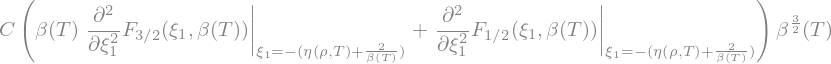

In [37]:
d2np_deta2 = diff(n_p_full, eta, eta)
d2np_deta2

$\partial^2 n_p / \partial \eta \partial\beta$

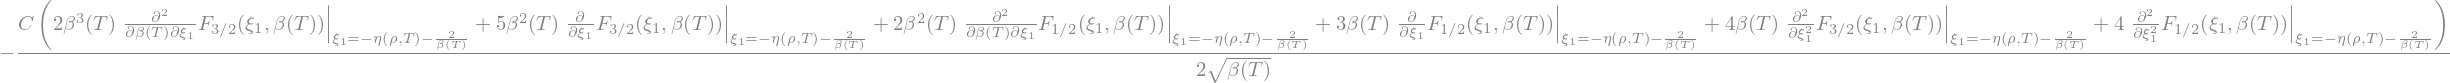

In [38]:
d2np_detadbeta = diff(n_p_full, eta, beta)
simplify(d2np_detadbeta)

$\partial^2 n_p / \partial \beta^2$

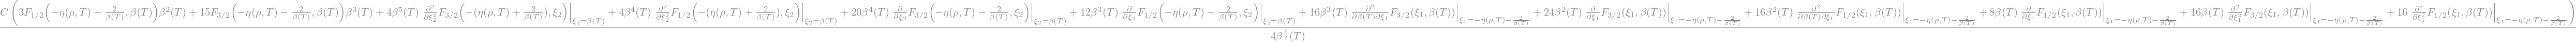

In [39]:
d2np_dbeta2 = diff(n_p_full, beta, beta)
simplify(d2np_dbeta2)

## Now thermodynamic derivatives

We just need the derivatives with respect to $\eta$ and $\beta$, so we can apply the chain rule.

In [40]:
A, B = symbols("A B", constant=True)

In [41]:
p_e_full = A * beta**Rational(5,2) * (F32_expr + Rational(1, 2) * beta * F52_expr)
E_e_full = B * beta**Rational(5,2) * (F32_expr + beta * F52_expr)

### $p_e$

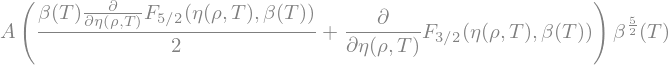

In [42]:
dpe_deta = diff(p_e_full, eta)
dpe_deta

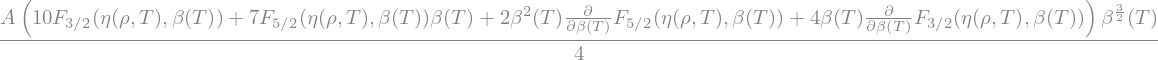

In [43]:
dpe_dbeta = diff(p_e_full, beta)
simplify(dpe_dbeta)

### $e_e$

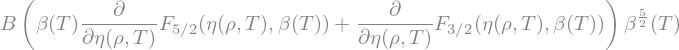

In [44]:
dEe_deta = diff(E_e_full, eta)
simplify(dEe_deta)

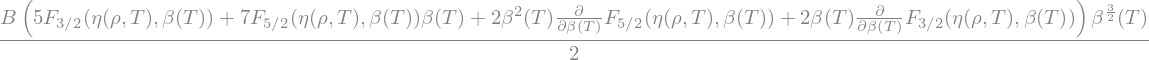

In [45]:
dEe_dbeta = diff(E_e_full, beta)
simplify(dEe_dbeta)

### positrons

In [46]:
Erm = symbols(r"E_{rm}", constants=True)

In [47]:
p_p_full = A * beta**Rational(5,2) * (F32_tilde_expr + Rational(1,2) * beta * F52_tilde_expr)
E_p_full = B * beta**Rational(5,2) * (F32_tilde_expr + beta * F52_tilde_expr) + 2 * Erm * n_p_full

### $p_p$

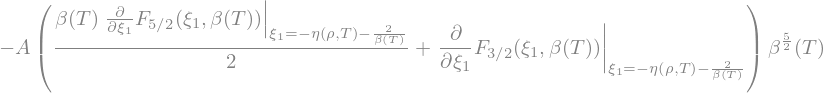

In [48]:
dpp_deta = diff(p_p_full, eta)
simplify(dpp_deta)

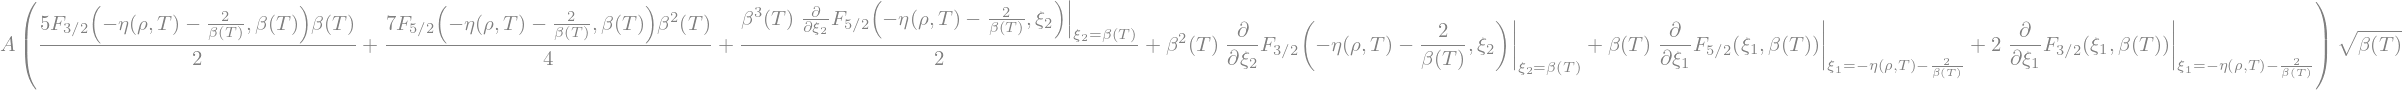

In [49]:
dpp_dbeta = diff(p_p_full, beta)
simplify(dpp_dbeta)

### $e_p$

The full $E_p$ includes the rest mass contribution of the positrons that were created.  We don't need to explicitly differentiate this here, since that is just proportional to $n_p$, which we already know the derivatives of.  Therefore, we'll work with just the remaining part.

In [50]:
E_p_partial = B * beta**Rational(5,2) * (F32_tilde_expr + beta * F52_tilde_expr)

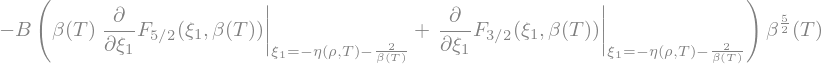

In [51]:
dEp_deta = diff(E_p_partial, eta)
simplify(dEp_deta)

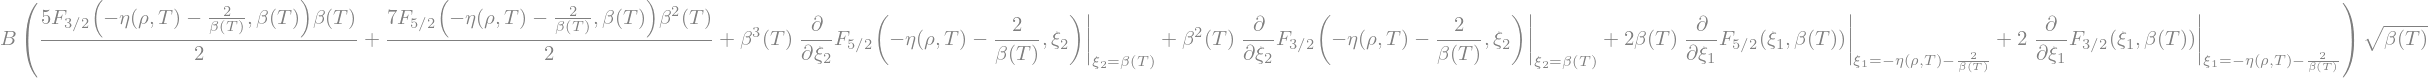

In [52]:
dEp_dbeta = diff(E_p_partial, beta)
simplify(dEp_dbeta)

## Alternate approach

We could have SymPy do the chain rule for us itself, e.g., compute $\partial p_e / \partial \rho |_T$ directly as:

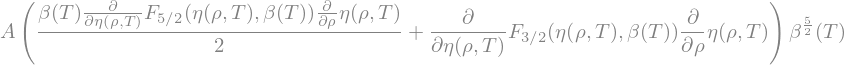

In [53]:
dpe_drho = diff(p_e_full, rho)
dpe_drho

but these expressions start to get very complex (see below), and it is easier to just build the terms that go into the chainrule separately, as above.

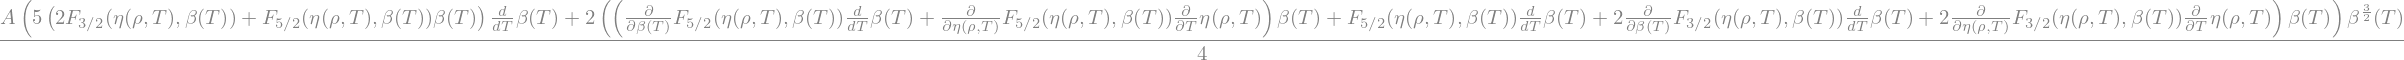

In [54]:
dpe_dT = diff(p_e_full, T)
simplify(dpe_dT)